In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from simpsons_paradox import SimpsonsParadox

In [2]:
plt.rcParams["figure.figsize"] = (10, 7)
sns.set(style="darkgrid")
sns.set(font_scale=1.5)

### Load Data

In [3]:
## Example 1: Disease Data
disease = pd.read_csv('data/SP_Data.txt')

## Example 2: Census Data
## Needs weighting=False to display weak Simpson's pair
# df = pd.read_csv('data/CensusModified.csv')
# dv = 'Income'
# bin_columns = []
# ignore_columns = []

## Example 3: Baseball Data
## Needs max_pvalue=1
# df = pd.read_csv('data/baseball_data.csv')
# dv = 'outcome'
# bin_columns = []
# ignore_columns = ['Unnamed: 0']

## Example 4: Admissions Data
# df = pd.read_csv('data/admissions_data.csv')
# dv = 'Admit'
# bin_columns = []
# ignore_columns = ['Unnamed: 0']

## Example 5: Khan Academy Data
# df = pd.read_csv('data/small_khancademy.csv')
# dv = 'performance'
# bin_columns = ['timestamp', 'solve_time', 'attempts', 
#                'tspp', 'session_num', 'session_index',
#               'session_length', 'all_first_attempts', 
#                'signup_duration', 'total_solving_time',
#               'all_attempts', 'all_problems', 
#                'all_sequences', 'month', 'join_month']
# ignore_columns = ["user_id", "problem_id"]

## Example 6: Coffee Data
# df = pd.read_csv('data/coffee_data.csv')
# dv = 'neuroticism'
# bin_columns = []
# ignore_columns = ['Unnamed: 0']

## Example 7: Student Performance Data
# df = pd.read_csv('data/student-mat.csv', sep=";")
# df['final_grade'] = np.where(df['G3'] >= 10, 1, 0)
# dv = 'final_grade'
# bin_columns = []
# ignore_columns = []

## Example 8: T.A. Evaluation Data
# df = pd.read_csv('data/TeachingAssistant_EvaluationDataset.csv')
# dv = 'Score'
# bin_columns = []
# ignore_columns = []

## Example 9: Breast Cancer Data
# df = pd.read_csv("data/breastcancer_data.csv")
# dv = "class"
# bin_columns = []
# ignore_columns = []

## Example 10: Iris Flower Data
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True).frame

### Get Simpson's Pairs

Independent Variable: sepal width (cm)


,variable,coefficient,pvalue,-95%,odds,+95%
1,sepal width (cm)_scaled,-1.399825,4.254283e-07,0.143368,0.24664,0.424301


Conditioned on: petal length (cm)


,bin_size,variable,coefficient,pvalue,-95%,odds,+95%
1,34,bin 1.0,-291.255037,NaN,NaN,3.232545e-127,NaN
1,30,bin 3.0,1.042365,0.164042,0.653298,2.835915e+00,12.310479
1,32,bin 2.0,1.514245,0.351890,0.187529,4.545990e+00,110.201762


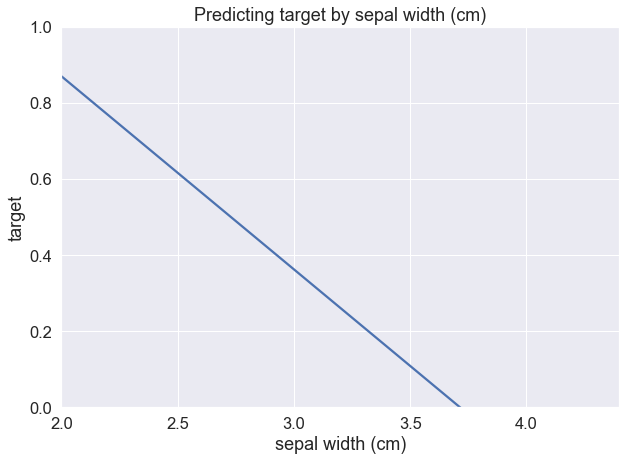

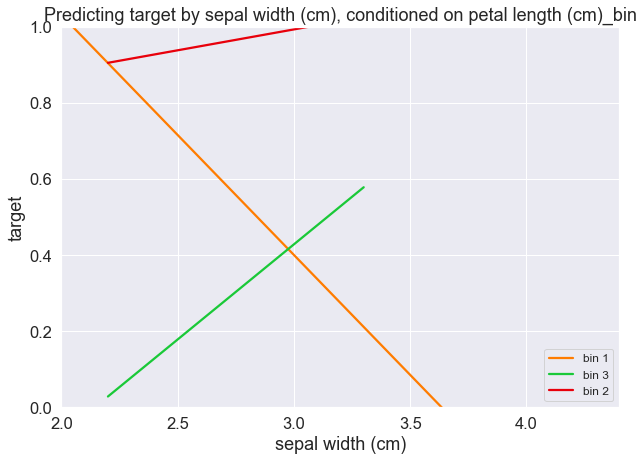

Independent Variable: sepal width (cm)


,variable,coefficient,pvalue,-95%,odds,+95%
1,sepal width (cm)_scaled,-1.399825,4.254283e-07,0.143368,0.24664,0.424301


Conditioned on: petal width (cm)


,variable,coefficient,pvalue,-95%,odds,+95%,bin_size
1,bin 1.0,-3.733215,0.002932,0.002044,0.023916,0.279830,55
1,bin 2.0,1.642502,0.381750,0.130289,5.168084,204.998723,26
1,bin 3.0,0.669444,0.263341,0.604350,1.953150,6.312224,30


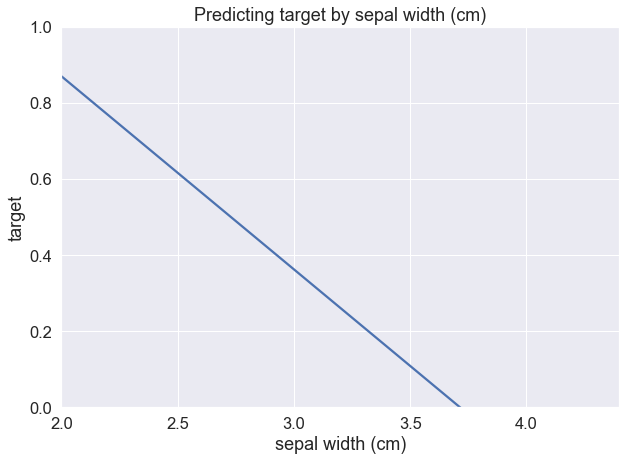

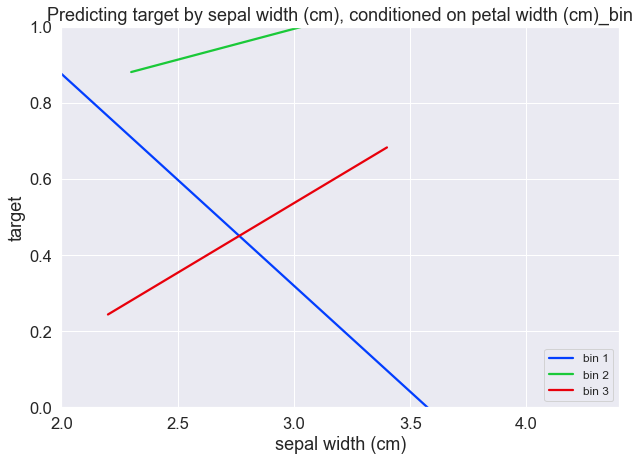

Independent Variable: petal length (cm)


,variable,coefficient,pvalue,-95%,odds,+95%
1,petal length (cm)_scaled,0.449868,0.01502,1.091224,1.568105,2.253391


Conditioned on: petal width (cm)


,variable,coefficient,pvalue,-95%,odds,+95%,bin_size
1,bin 1.0,109.573628,0.999958,0.000000e+00,3.865646e+47,inf,55
1,bin 2.0,-81.996634,0.990821,0.000000e+00,2.450835e-36,inf,26
1,bin 3.0,-9.307847,0.011878,6.432266e-08,9.070966e-05,0.127921,30


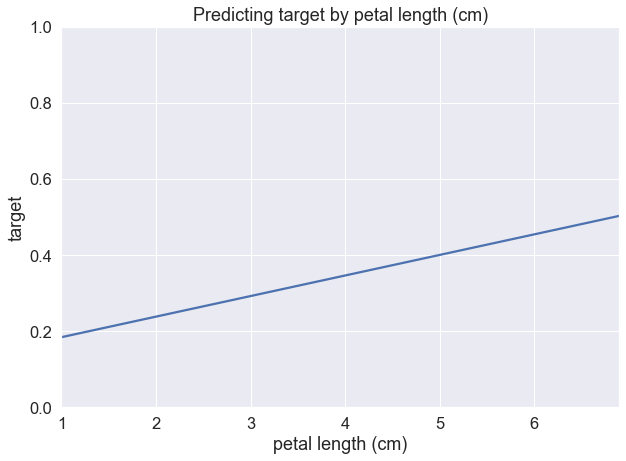

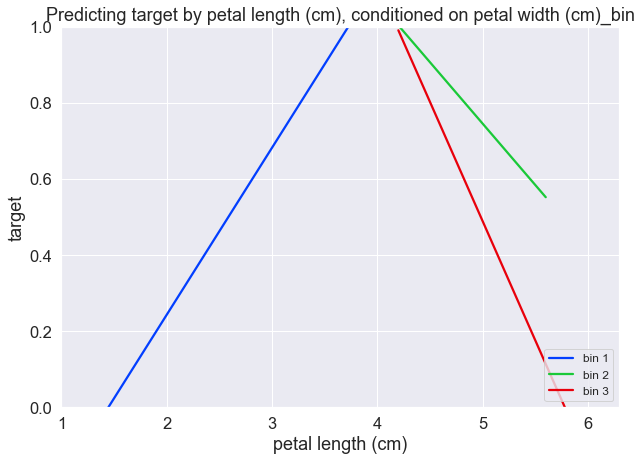

[('sepal width (cm)', 'petal length (cm)'),
 ('sepal width (cm)', 'petal width (cm)'),
 ('petal length (cm)', 'petal width (cm)')]

In [4]:
sp_iris = SimpsonsParadox(df=iris, dv='target', target_category=1, output_plots=True, quiet=True)
sp_iris.get_simpsons_pairs()

Warning! Simpson’s Paradox was detected in this pair of variables:
('Treated', 'Gender')
Independent Variable: Treated


,variable,coefficient,pvalue,-95%,odds,+95%
1,Treated,0.537143,0.000172,1.292881,1.711112,2.264635


Conditioned on: Gender


,variable,coefficient,pvalue,-95%,odds,+95%,bin_size
1,bin 1,-0.348296,0.189493,0.419549,0.705890,1.187657,400
1,bin 0,-0.636022,0.035764,0.292367,0.529394,0.958583,500


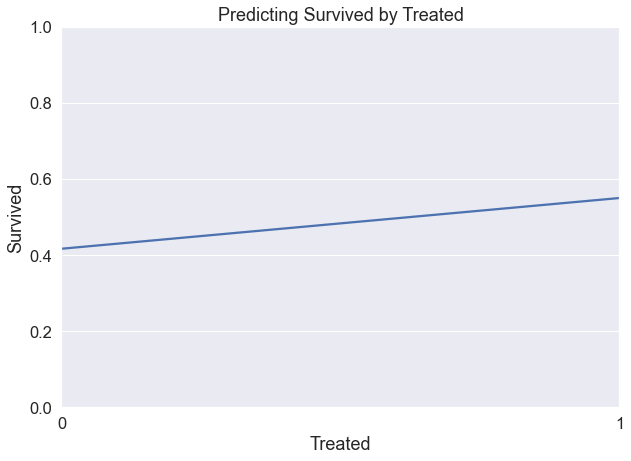

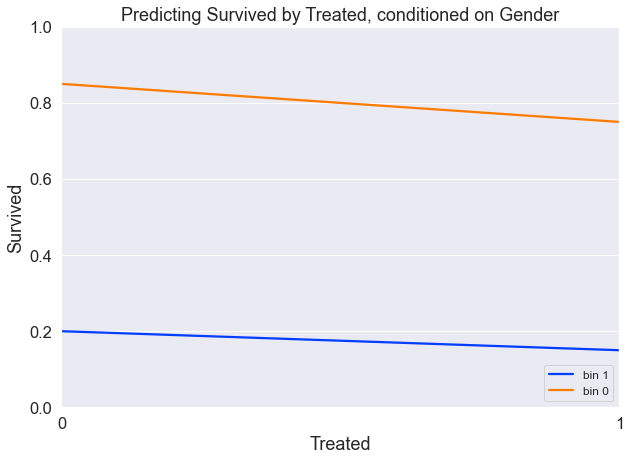

1 Simpson’s Pair(s) were detected in your dataset.


[('Treated', 'Gender')]

In [5]:
sp_disease = SimpsonsParadox(df=disease, dv='Survived', ignore_columns=['PatientId'], output_plots=True)
sp_disease.get_simpsons_pairs()